In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
np.random.seed(42)
path = Path('../data/imgs')

In [4]:
bs = 64
data = ImageDataBunch.from_folder(path, train='train', test='test', valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, bs=bs, num_workers=4).normalize(imagenet_stats)

In [5]:
learn = cnn_learner(data, models.vgg19_bn, metrics=[accuracy, FBeta(average='macro')])

In [6]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.943356,0.304491,0.912355,0.907213,04:11
1,0.418848,0.142348,0.958742,0.956508,02:38
2,0.278410,0.083286,0.975245,0.973522,02:39
3,0.187897,0.061557,0.981936,0.980620,02:39
4,0.152647,0.053478,0.983720,0.982210,02:40


In [7]:
learn.save('vgg19_bn-stage-1')

In [8]:
learn.unfreeze()

In [9]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


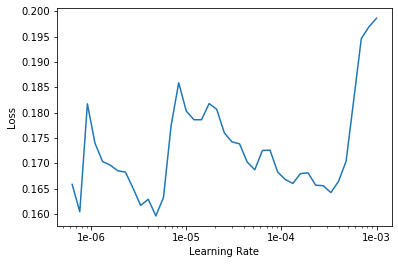

In [10]:
learn.recorder.plot()

In [11]:
learn.fit_one_cycle(5, max_lr=slice(1e-6, 9e-6))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.134081,0.049904,0.984389,0.982803,03:19
1,0.119110,0.041591,0.987288,0.986225,03:19
2,0.092303,0.037857,0.987734,0.986606,03:19
3,0.082267,0.036345,0.988180,0.987102,03:19
4,0.091566,0.035701,0.988626,0.987574,03:19


In [12]:
learn.save('vgg19_bn-stage-2')

In [16]:
learn.export()